<ipython-input-2-811f95ca831d>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(white_ball_numbers), y=list(white_ball_frequencies), palette="Blues_d")


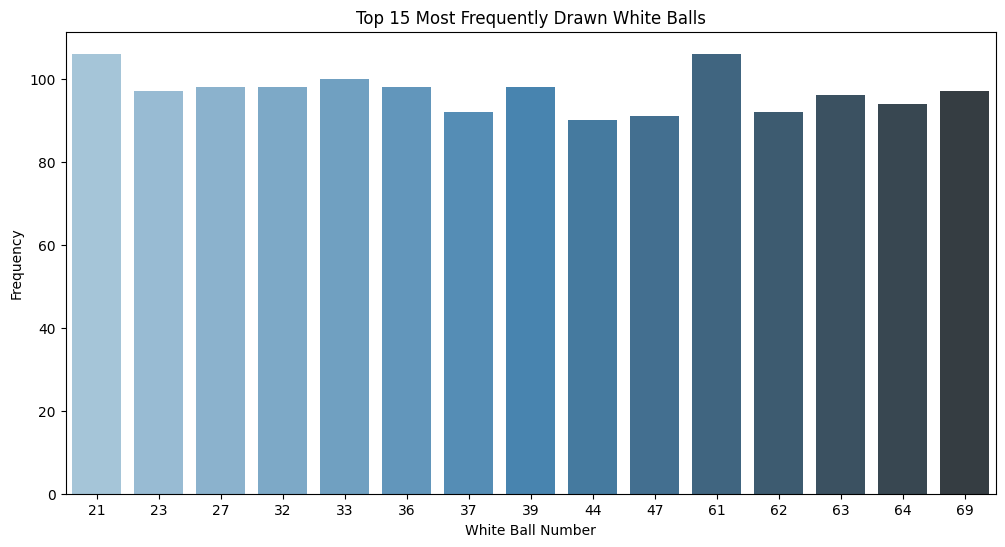

<ipython-input-2-811f95ca831d>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=powerball_counts.index, y=powerball_counts.values, palette="Reds_d")


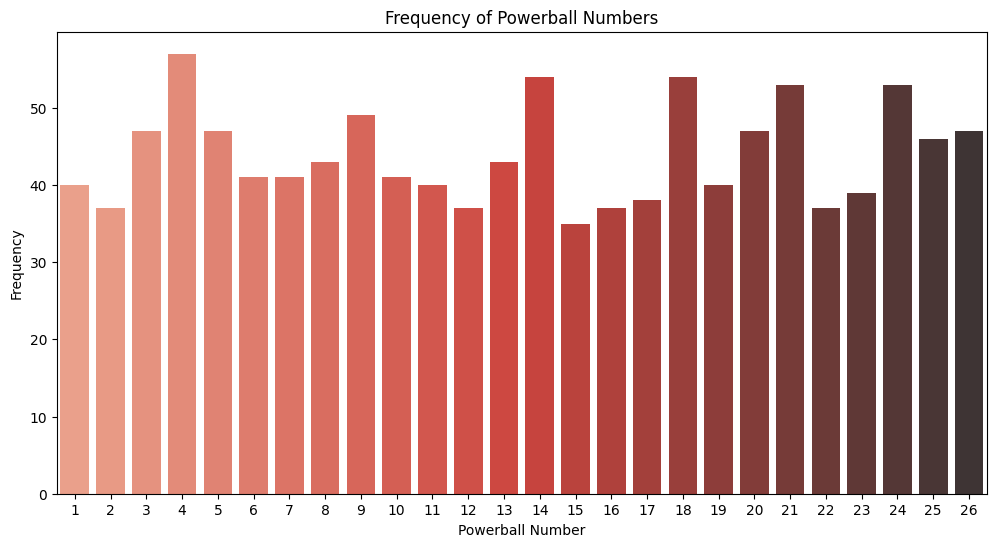

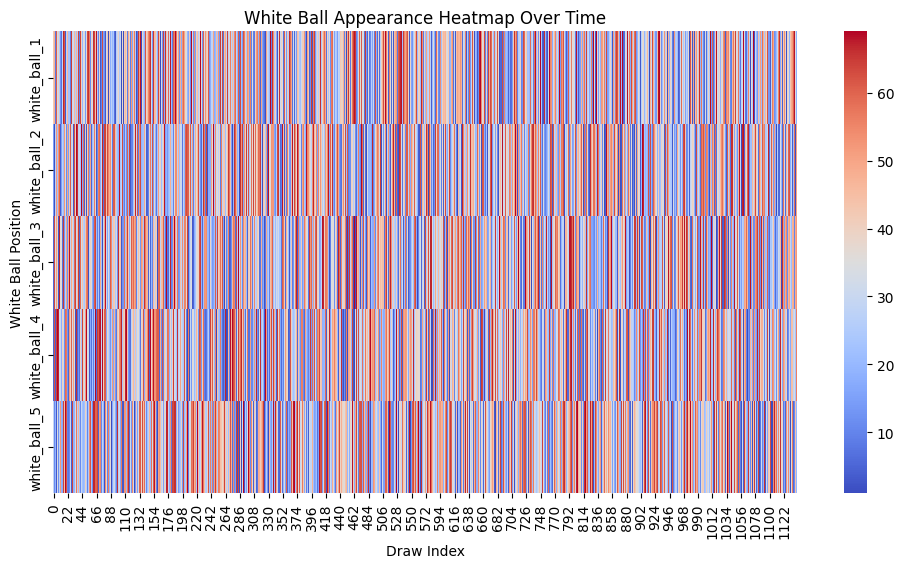

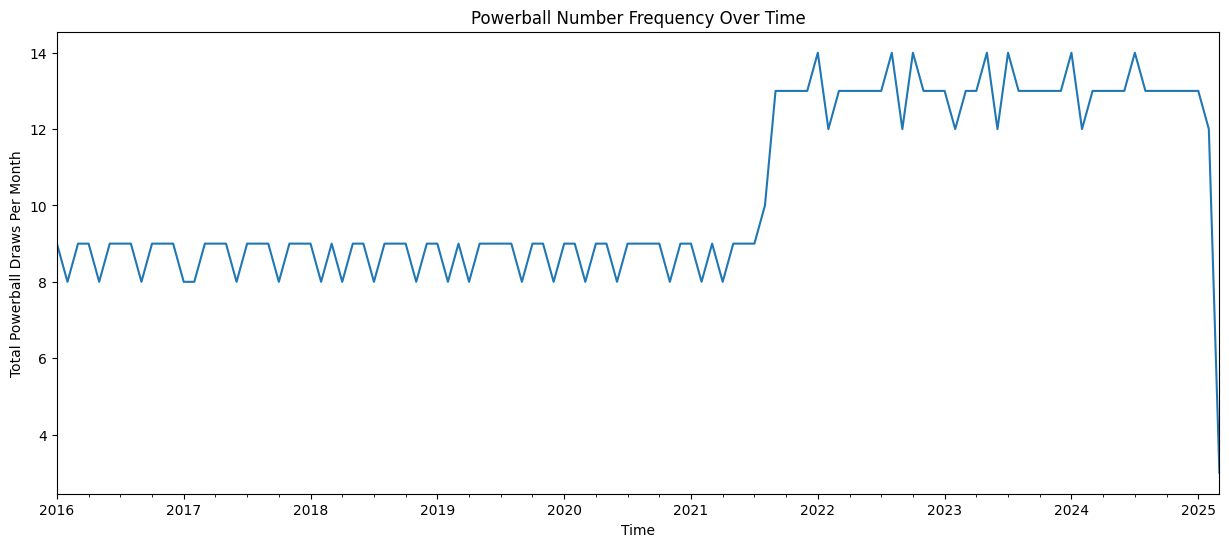

<ipython-input-2-811f95ca831d>:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pair_labels), y=list(pair_frequencies), palette="Purples_d")


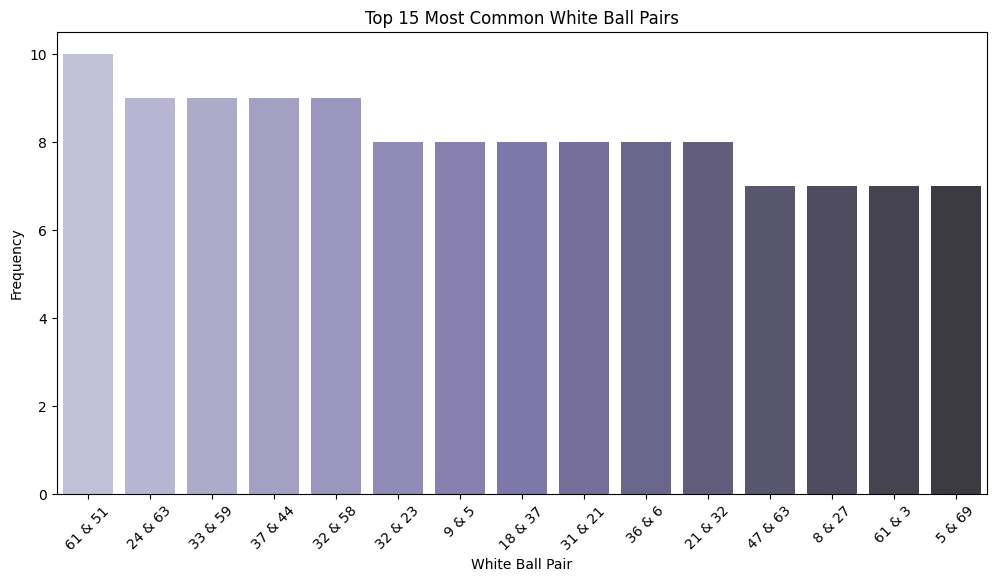

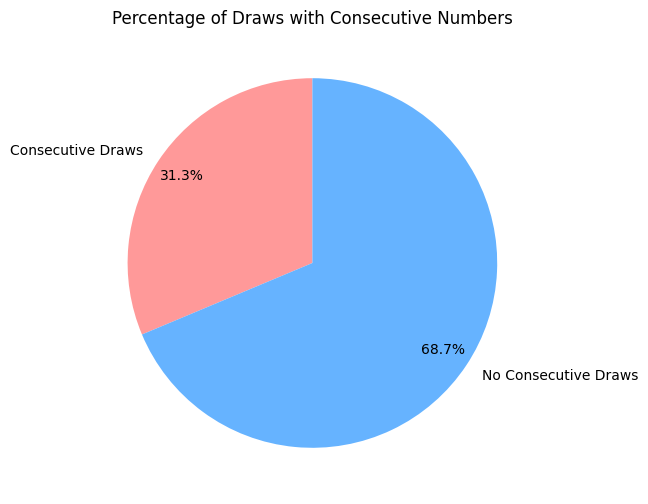

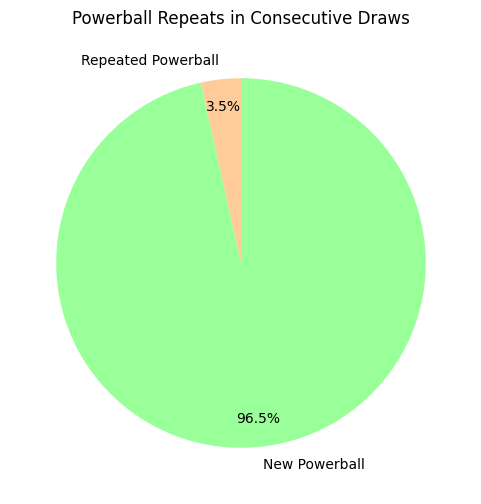

In [2]:
# =========================== Step 1: Load & Inspect Dataset ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
file_path = "/content/drive/MyDrive/powerball_powerball.csv"
df = pd.read_csv(file_path)

# Convert date columns to datetime format if available
if {'year', 'month', 'day'}.issubset(df.columns):
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
else:
    df['date'] = pd.to_datetime(df['month'], errors='coerce')

# Display first few rows
df.head()

# =========================== Step 2: Data Exploration & Visualization ===========================

# Distribution of White Balls (Top 15 Most Common)
all_white_balls = df[['white_ball_1', 'white_ball_2', 'white_ball_3', 'white_ball_4', 'white_ball_5']].values.flatten()
white_ball_counts = Counter(all_white_balls)

# Get the top 15 most common white balls
most_common_white_balls = white_ball_counts.most_common(15)
white_ball_numbers, white_ball_frequencies = zip(*most_common_white_balls)

# Plot frequency of most common white balls
plt.figure(figsize=(12, 6))
sns.barplot(x=list(white_ball_numbers), y=list(white_ball_frequencies), palette="Blues_d")
plt.xlabel("White Ball Number")
plt.ylabel("Frequency")
plt.title("Top 15 Most Frequently Drawn White Balls")
plt.show()

# Distribution of Powerball Numbers
powerball_counts = df['pb'].value_counts().sort_values(ascending=False)

# Plot frequency of Powerball numbers
plt.figure(figsize=(12, 6))
sns.barplot(x=powerball_counts.index, y=powerball_counts.values, palette="Reds_d")
plt.xlabel("Powerball Number")
plt.ylabel("Frequency")
plt.title("Frequency of Powerball Numbers")
plt.show()

# Heatmap of White Ball Occurrences Over Time
plt.figure(figsize=(12, 6))
sns.heatmap(df[['white_ball_1', 'white_ball_2', 'white_ball_3', 'white_ball_4', 'white_ball_5']].T, cmap="coolwarm", cbar=True)
plt.xlabel("Draw Index")
plt.ylabel("White Ball Position")
plt.title("White Ball Appearance Heatmap Over Time")
plt.show()

# Powerball Frequency Over Time
df['month_year'] = df['date'].dt.to_period('M')  # Convert date to Month-Year
pb_monthly_counts = df.groupby('month_year')['pb'].value_counts().unstack().fillna(0)

plt.figure(figsize=(15, 6))
pb_monthly_counts.sum(axis=1).plot()
plt.xlabel("Time")
plt.ylabel("Total Powerball Draws Per Month")
plt.title("Powerball Number Frequency Over Time")
plt.show()

# Most Common White Ball Pairs
from itertools import combinations

# Count occurrences of each number pair
pair_counts = Counter()
for _, row in df.iterrows():
    pairs = list(combinations(row[['white_ball_1', 'white_ball_2', 'white_ball_3', 'white_ball_4', 'white_ball_5']], 2))
    pair_counts.update(pairs)

# Get the 15 most common white ball pairs
most_common_pairs = pair_counts.most_common(15)
pair_labels, pair_frequencies = zip(*most_common_pairs)

# Convert tuple pairs to string for visualization
pair_labels = ['{} & {}'.format(p[0], p[1]) for p in pair_labels]

# Plot frequency of most common white ball pairs
plt.figure(figsize=(12, 6))
sns.barplot(x=list(pair_labels), y=list(pair_frequencies), palette="Purples_d")
plt.xticks(rotation=45)
plt.xlabel("White Ball Pair")
plt.ylabel("Frequency")
plt.title("Top 15 Most Common White Ball Pairs")
plt.show()

# Consecutive Draw Patterns
# Function to check consecutive occurrences
def check_consecutive(row, previous_row):
    return any(num in previous_row for num in row[['white_ball_1', 'white_ball_2', 'white_ball_3', 'white_ball_4', 'white_ball_5']])

# Shift dataset to compare with previous draw
df['prev_draw'] = df[['white_ball_1', 'white_ball_2', 'white_ball_3', 'white_ball_4', 'white_ball_5']].shift(1).apply(tuple, axis=1)
df['consecutive_match'] = df.apply(lambda row: check_consecutive(row, row['prev_draw']) if pd.notna(row['prev_draw']) else False, axis=1)

# Plot percentage of draws with at least one repeated number
consecutive_percentage = df['consecutive_match'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie([consecutive_percentage, 100 - consecutive_percentage], labels=['Consecutive Draws', 'No Consecutive Draws'],
        autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90, pctdistance=0.85)
plt.title("Percentage of Draws with Consecutive Numbers")
plt.show()

# Repeated Powerballs in Consecutive Draws
df['prev_powerball'] = df['pb'].shift(1)
df['powerball_repeat'] = df['pb'] == df['prev_powerball']

# Plot Powerball repeat frequency
repeat_count = df['powerball_repeat'].sum()
total_draws = len(df) - 1  # Exclude first draw

plt.figure(figsize=(6, 6))
plt.pie([repeat_count, total_draws - repeat_count], labels=['Repeated Powerball', 'New Powerball'],
        autopct='%1.1f%%', colors=['#ffcc99','#99ff99'], startangle=90, pctdistance=0.85)
plt.title("Powerball Repeats in Consecutive Draws")
plt.show()
